<div style="border-radius:10px; padding: 15px; font-size:90%; text-align:left">

<h2 align="left"><font color=skyblue> Load Libraries and Data</font></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = pd.read_csv("E:/Customer Churn Analysis/Dataset/Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> Data Exploration</font></h2>

This method provides a summary of the DataFrame, showing the row count, column names, non-null counts, data types, and memory usage, helping quickly identify the dataset's structure and any missing values.

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue></font></h2>
This methods provides summary statistics (count, mean, std deviation, min, 25%, median, 75%, max) for each numeric column, offering a quick overview of value distribution and spread.

In [3]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [4]:
print(data['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> Data Cleaning</font></h2>

Handle any missing values, encode categorical variables, and prepare the data for analysis.

In [5]:
data = data.dropna()

In [6]:
for column in data.select_dtypes(include=['object']).columns:
    if data[column].nunique() == 2:
        data[column] = LabelEncoder().fit_transform(data[column])
    else:
        data = pd.get_dummies(data, columns=[column], drop_first=True)

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> Data Visualization</font></h2>

Visualize churn and other significant variables.

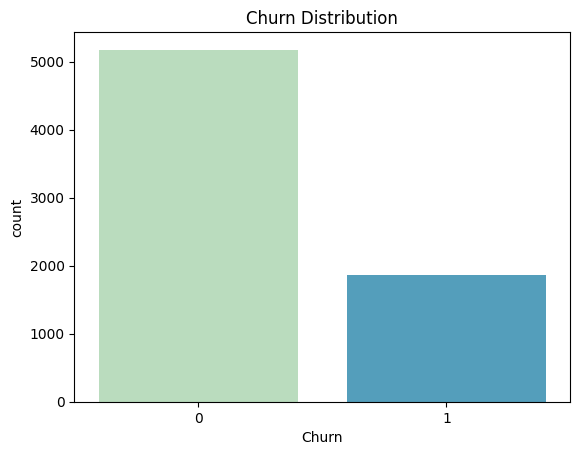

In [7]:
sns.countplot(x="Churn", data=data, palette="GnBu", hue="Churn", dodge=False)
plt.legend([],[], frameon=False)  
plt.title('Churn Distribution')
plt.show()

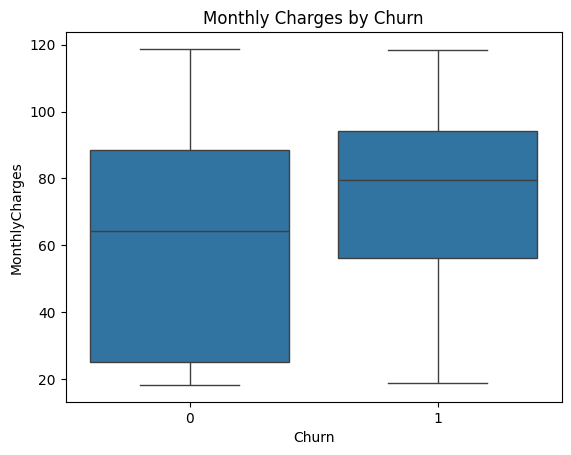

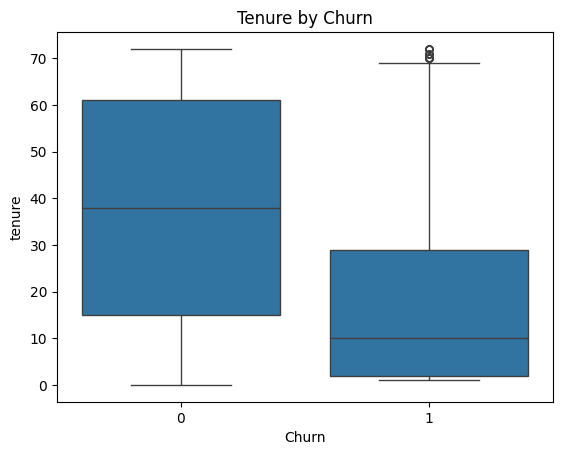

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data,orient="vertical",fliersize=5)
plt.title('Monthly Charges by Churn')
plt.show()

sns.boxplot(x='Churn', y='tenure', data=data,orient="vertical",fliersize=5)
plt.title('Tenure by Churn')
plt.show()

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> Feature Selection and Scaling</font></h2>

Select relevant features and scale them for modeling.

In [9]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> Model Building</font></h2>


We’ll use a Random Forest model for churn prediction.

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue></font></h2>
The code creates a scatter plot of MonthlyCharges vs. tenure, with point size indicating Churn status and color representing gender, helping visualize relationships among these variables.

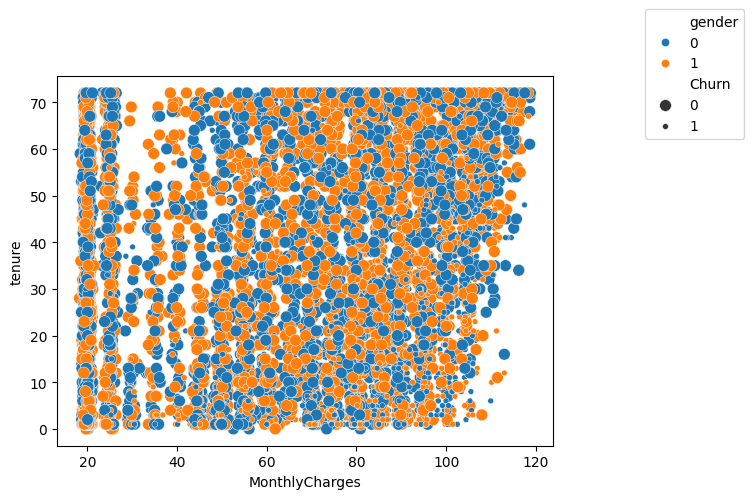

In [14]:
sns.scatterplot(data=data, x="MonthlyCharges", y="tenure", size="Churn",hue="gender")
plt.legend(bbox_to_anchor=(0.2, 0, 1.2,1.2)) #(x,y,width,height)
plt.show()

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue></font></h2>
The code plots a line chart of MonthlyCharges over tenure segmented by gender, showing spending trends across customer duration.

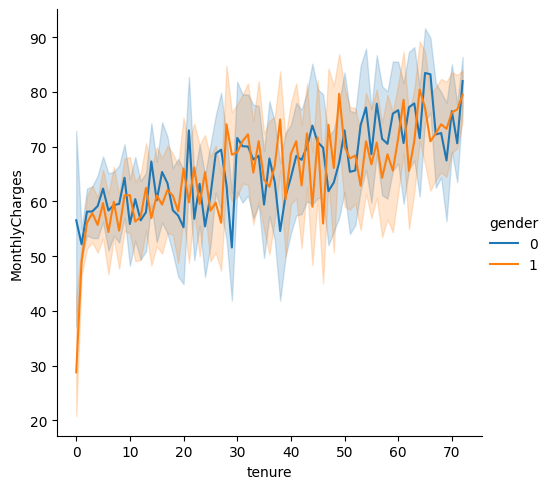

In [15]:
sns.relplot(data=data,x="tenure",y="MonthlyCharges",hue="gender",kind="line")
plt.show()

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> </font></h2>

The code calculates the average MonthlyCharges for each tenure group and visualizes it as a heatmap, highlighting how charges vary over customer tenure.

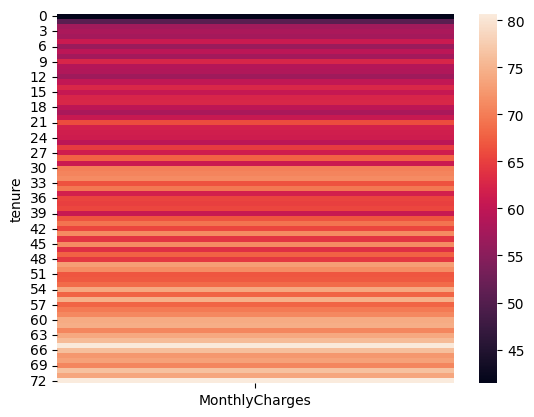

In [16]:
gp=data.groupby("tenure").agg({"MonthlyCharges":"mean"})
sns.heatmap(gp)
plt.show()

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Evaluate the Model</font></h2>


Evaluate model performance with a classification report and confusion matrix.

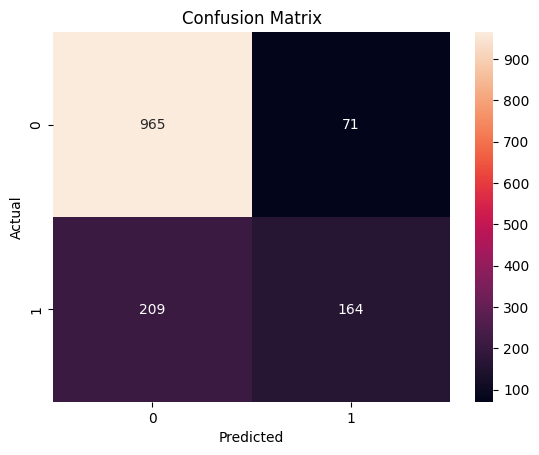

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
